<a href="https://colab.research.google.com/github/Beta628427/Tesis/blob/master/RNeuronal_Beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Red Neuronal

import numpy as np # Numeros
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

(400, 1)


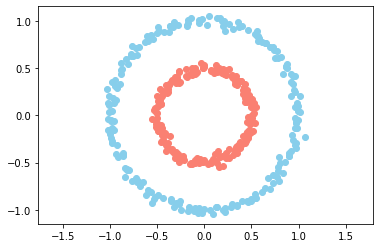

In [34]:
# Crear el dataset

n = 400
p = 2

X, y = make_circles(n_samples=n, factor= 0.5, noise= 0.03)

y = y[:, np.newaxis]

print(y.shape)

plt.scatter(X[ y[:,0]==0 ,0], X[ y[:,0]==0 ,1], c= "skyblue")
plt.scatter(X[ y[:,0]==1 ,0], X[ y[:,0]==1 ,1], c= "salmon")
plt.axis("equal")
plt.show()

In [35]:
y.shape

(400, 1)

In [0]:
# Clase de capa de red

class neural_layer():

  # n_conn = numero de conecciones
  # n_neur = numero de neuronas
  # act_f  = funcion de activación

  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    # ventor columna (1)
    self.b     = np.random.rand(1,n_neur) * 2 -1
    self.w     = np.random.rand(n_conn, n_neur) 


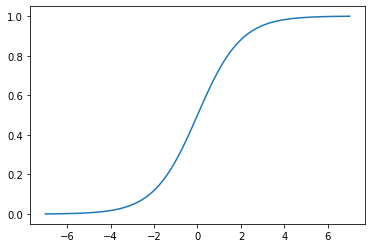

In [37]:
# Funciones de activación

# Sigmoido
sign = (lambda x: 1/ (1 + np.e **(-x)),
        lambda x: x * (1-x))

# Relu
relu = (lambda x: np.maximum(0, x))

_x = np.linspace(-7, 7, 100)

plt.plot(_x, sign[0](_x))

In [0]:
layer0 = neural_layer(p, 4, sign)
Layer1 = neural_layer(4, 8, sign)
# ....

def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn



In [59]:
topology = [p, 4, 1]

neural_net = create_nn(topology, sign)

# Yp = predicha
# Yr = Real

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  out = [(None, X)]
  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z, a))
  if train:
    # Backward pass
    deltas = []
    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      if l == len(neural_net) - 1:
        # calculamos delta de ultima capa
        # formula de delta0
        deltas.insert(0, l2_cost[1](a, y) * neural_net[l].act_f[1](a))
        #print(deltas.shape)
      else:
        # calcular delta respecto a capa previa
        deltas.insert(0, deltas[0]@neural_net[l+1].w.T*neural_net[l].act_f[1](a))
      _w = neural_net[l].w
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims= True) * lr
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr
  return out[-1][1]


train(neural_net, X, y, l2_cost, 0.5)

array([[0.69964688],
       [0.5754234 ],
       [0.69124441],
       [0.49744958],
       [0.64108015],
       [0.68836605],
       [0.62183244],
       [0.60003629],
       [0.58915299],
       [0.68994189],
       [0.557785  ],
       [0.50419042],
       [0.5449548 ],
       [0.64729649],
       [0.48984556],
       [0.6644681 ],
       [0.69375553],
       [0.49922142],
       [0.63994462],
       [0.56697464],
       [0.52681546],
       [0.56463157],
       [0.54948824],
       [0.55861938],
       [0.55931953],
       [0.55342117],
       [0.54222648],
       [0.62819187],
       [0.61672191],
       [0.64598493],
       [0.49939414],
       [0.68552127],
       [0.53986092],
       [0.62746669],
       [0.62698587],
       [0.5394858 ],
       [0.68459461],
       [0.69718134],
       [0.63127209],
       [0.6674316 ],
       [0.54256869],
       [0.6673507 ],
       [0.63807217],
       [0.54037839],
       [0.50331119],
       [0.63326074],
       [0.49416333],
       [0.545

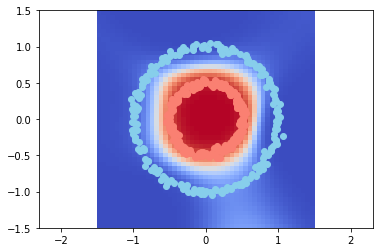

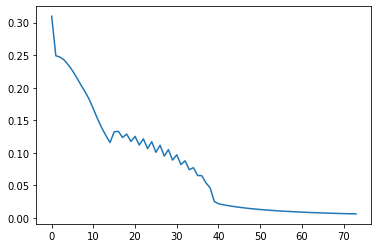

[[3.93205512e-02]
 [9.29253575e-01]
 [1.37323149e-01]
 [4.58428854e-02]
 [9.57473340e-01]
 [1.69099326e-02]
 [1.02556711e-01]
 [9.02348403e-01]
 [9.42467990e-01]
 [1.13046997e-01]
 [1.26881688e-01]
 [8.89388648e-02]
 [9.43054225e-01]
 [9.02508157e-01]
 [1.25776449e-02]
 [7.76158771e-03]
 [1.16743676e-01]
 [5.07454856e-02]
 [1.13895071e-03]
 [9.38724603e-01]
 [1.70241612e-01]
 [9.33703108e-01]
 [8.70459072e-01]
 [8.63247100e-01]
 [9.16209199e-01]
 [6.43688563e-02]
 [8.73876173e-01]
 [9.54399753e-01]
 [2.42751133e-03]
 [9.33052678e-01]
 [4.94641526e-02]
 [7.18171147e-02]
 [9.25142515e-01]
 [1.45097433e-03]
 [1.16712543e-01]
 [9.22242001e-01]
 [1.17082549e-01]
 [5.53561909e-02]
 [9.27361014e-01]
 [1.49624298e-02]
 [9.06230590e-01]
 [3.12788044e-02]
 [9.08128921e-01]
 [8.86486643e-01]
 [6.04613201e-02]
 [9.57603210e-01]
 [2.58286507e-02]
 [4.09257321e-02]
 [9.47414181e-01]
 [8.97030734e-01]
 [1.10785532e-01]
 [6.50940110e-02]
 [9.60574408e-01]
 [1.92476810e-01]
 [3.44690662e-03]
 [9.203936

In [0]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sign)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[y[:,0] == 0, 0], X[y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[y[:,0] == 1, 0], X[y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  